# Analyzing the clusters obtained through the Cytograph pipeline
In this notebook, I analyzed the clusters stored in the anndata object from `...noAdolescence.h5ad` to assign labels to them. This process involved retrieving the top 25 marker genes for each cluster and overlaying known markers on the UMAP visualization of the training dataset.

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad
from harmony import harmonize
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
sc.logging.print_versions()
sc.set_figure_params(facecolor="white", figsize=(7, 4))
sc.settings.verbosity = 3

-----
anndata     0.10.8
scanpy      1.10.1
-----
PIL                         10.2.0
anyio                       NA
arrow                       1.3.0
asciitree                   NA
asttokens                   NA
astunparse                  1.6.3
attr                        23.1.0
attrs                       23.1.0
babel                       2.11.0
bottleneck                  1.3.7
brotli                      1.0.9
certifi                     2024.08.30
cffi                        1.16.0
charset_normalizer          2.0.4
cloudpickle                 3.0.0
colorama                    0.4.6
comm                        0.2.1
cycler                      0.10.0
cython_runtime              NA
dask                        2024.7.0
dateutil                    2.8.2
debugpy                     1.6.7
decorator                   5.1.1
defusedxml                  0.7.1
executing                   0.8.3
fastjsonschema              NA
fqdn                        NA
h5py                        3.9.0
ha

I imported the anndata object `noAdolescence_nocc.h5ad` saved after running the Step 2 (removal of cc cells) in the main notebook `from_noAdolescence_to_final_training_dataset.ipynb`.

In [4]:
adata = sc.read_h5ad('/hpc/hers_basak/rnaseq_data/Silettilab/samples/final_useful_datasets/noAdolescence_nocc.h5ad')

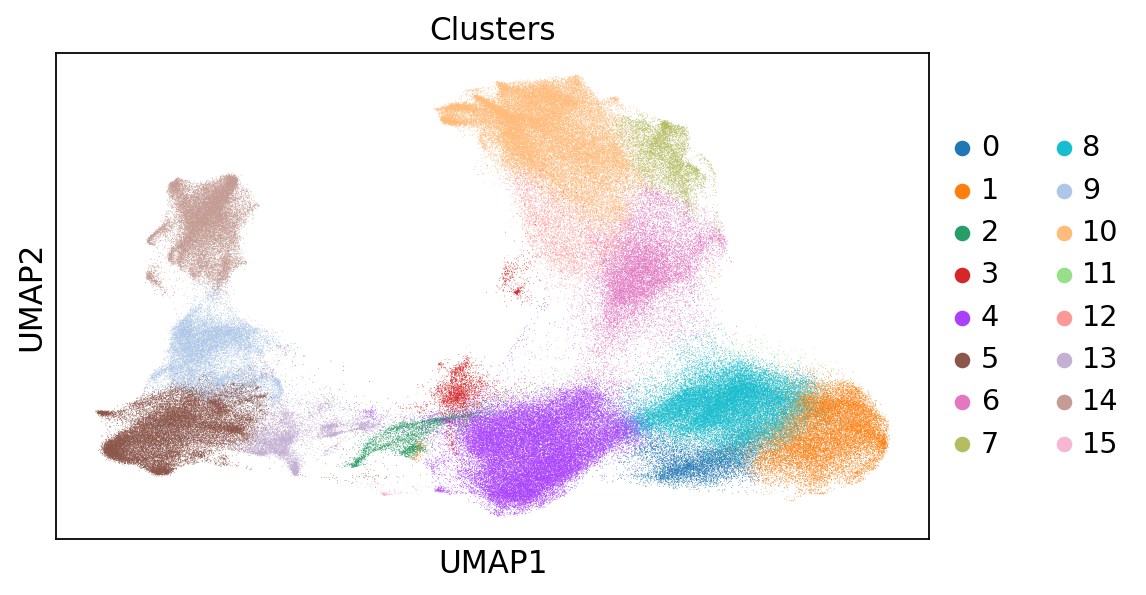

In [5]:
sc.pl.embedding(adata, basis = 'UMAP', color = 'Clusters')

## Step 1: Differential Expression Analysis

#### I normalized and logarithmized the data

In [6]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:19)


#### I performed Differential Expression Analysis, and plotted the first 25 markers for each cluster.

In [7]:
sc.tl.rank_genes_groups(adata, "Clusters", method="logreg")
for group in adata.uns['rank_genes_groups']['names'].dtype.names:
    genes = adata.uns['rank_genes_groups']['names'][group][:25]
    print(f"Group {group}:")
    print(", ".join(genes))
    print("\n")

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
 (0:15:43)
Group 0:
SFRP1, DLG2, CDH12, KIAA1217, MGAT4C, ID4, FSTL5, WWOX, THSD4, LIMCH1, SEMA5A, EPHA3, HS6ST2, RPS4Y1, NAV3, CDH4, LIX1, UTRN, RAPGEF2, CADM2, ZNF804A, KCNQ3, ACTR3B, ANKS1B, ADAMTS6


Group 1:
RPS4Y1, DPP10, DDIT4, CADPS, ID4, RSPO3, DNAJA1, LRRN1, SOX3, SYT1, LEF1, HEY1, OLFM3, HMGA2, WWOX, HECW1, CACHD1, EPHA6, B3GAT2, LINC00486, FOXP2, HSPH1, RPL17, EIF1AY, MALAT1


Group 2:
PRKG1, LTBP1, CADPS, RSPO3, DPP10, EEPD1, TSHZ2, CACHD1, LRRC4C, ZBTB20, NELL1, LRIG1, CXCR4, SLIT2, STON2, NR2F1, MAML2, CDO1, NEBL, LRRC3B, CRYAB, NCAM2, SOX6, PDE1A, MEGF10


Group 3:
NRG1, MYT1L, RBFOX1, LRRC7, UNC5D, SYT1, PPFIA2, CCSER1, EPHA5, NELL2, LINC01122, PDGFD, SORBS2, RUNX1T1, RTN1, PTPRM, DCC, RALYL, TMEM132B, FRMD4B, NKAIN2, PTPRD, DCX, ANK3, EPB41L3


Group 4:
NRG1, PTPRM, TMEM132B, PDGFD, LTBP

/hpc/hers_basak/rnaseq_data/Silettilab/icoratella/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Regarding cluster two**, it appears ambiguous, particularly in relation to its gene expression profile. It falls between Radial Glia and other nIPCs. One hypothesis is that it might represent hippocampal cells, based on PROX1 expression (See few cells below). Given this uncertainty, we removed the cluster.

**Cluster 3** appears to be nIPC from its expression profile, but it is close to Radial Glia on the UMAP. Due to this ambiguity, I removed it.

**Regarding cluster 15**, it contains some mitochondrial genes and does not localize near any other major groups on the UMAP. Therefore, we decided to exclude these cells.

**cluster 11** cells are mitotic, then we removed them.

## Step 2:  Testing of known marker genes on the UMAP

#### Astrocytic markers

In [ ]:
sc.pl.embedding(adata, basis = 'UMAP', color = ['S100B', 'SLC1A3', 'AQP4', 'ALDH1L1', 'GFAP', 'APOE', 'ATF3', 
                   'RUNX2', 'ALYREF', 'ATP1A2'], vmax =4)

#### Radial Glia markers

In [ ]:
sc.pl.embedding(adata, basis = 'UMAP', color = ["VIM", "NES", "SOX2", "PAX6", "CDH2", "HOPX", "ITGB5"], vmax =4)

#### early Radial Glia markers

In [ ]:
sc.pl.embedding(adata, basis = 'UMAP', color = ["LIX1", "LEF1", "HEY1", "CRABP2", "AMBN", "TPD52L1",
 "SNCG", "ECEL1", "CNFN", "OLFM3"], vmax =4)

#### late Radial Glia markers

In [ ]:
sc.pl.embedding(adata, basis = 'UMAP', color = ["HOPX", "PDGFD", "LIPG", "IQGAP2", "AKAP12", "TMTC1", "FBXO32",
 "EVA1C", "LAMA3", "CCDC175"], vmax =4)

#### gIPCs markers

In [ ]:
sc.pl.embedding(adata, basis = 'UMAP', color = ["EGFR", "KIRREL3", "DPF3", "SLIT1", "IRX1", "VIPR2"], vmax =4)

#### nIPC markers

In [ ]:
sc.pl.embedding(adata, basis = 'UMAP', color = ["NEUROG2", "NEUROG1", "EOMES", "HES6", "BTG2", 
 "GADD45G", "NEUROD1", "NEUROD2", "NEUROD6", "DCX"], vmax =4)

#### choroid plexus markers

In [ ]:
sc.pl.embedding(adata, basis = 'UMAP', color = ["TTR", "CLDN5", "OTX2"], vmax =4)

#### cilial markers

In [ ]:
sc.pl.embedding(adata, basis = 'UMAP', color = ["FOXJ1"], vmax =4)

#### hyppocampus regional markers

In [ ]:
sc.pl.embedding(adata, basis = 'UMAP', color = ['PROX1'], vmax =4)